In [232]:
# Import Libs
# Python package for Mathmatical libs
import math
import calendar
import numpy as np
import pandas as pd

# Python package to read data
import pandas_datareader as web

# Python package for graphical display
import matplotlib.pyplot as plt
%matplotlib inline

# Python package for Data Processing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [233]:
# Ignore Warnings

import warnings
warnings.simplefilter('ignore')

In [234]:
# Fetch Apple Stock quote from Yahoo for last 10 Years

apple_stock = web.DataReader('AAPL', data_source='yahoo', start='2020-01-01', end = '2021-2-25')
apple_stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,290.000000,290.000000,290.000000,290.000000,2.900000e+02,290.000000
mean,101.466130,98.606888,100.060276,100.097758,1.509478e+08,99.693670
std,24.230887,23.674329,24.152399,23.934512,6.825816e+07,24.078434
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.661041
25%,79.607498,77.846249,78.598124,78.743124,1.038144e+08,78.100435
50%,99.602501,96.672501,99.081249,98.041248,1.338080e+08,97.550476
75%,122.567501,118.749998,120.287500,120.837498,1.771206e+08,120.449390
max,145.089996,141.369995,143.600006,143.160004,4.268848e+08,142.946396


In [235]:
# Apple Stock Data
apple_stock.shape


(290, 6)

In [236]:
apple_stock.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

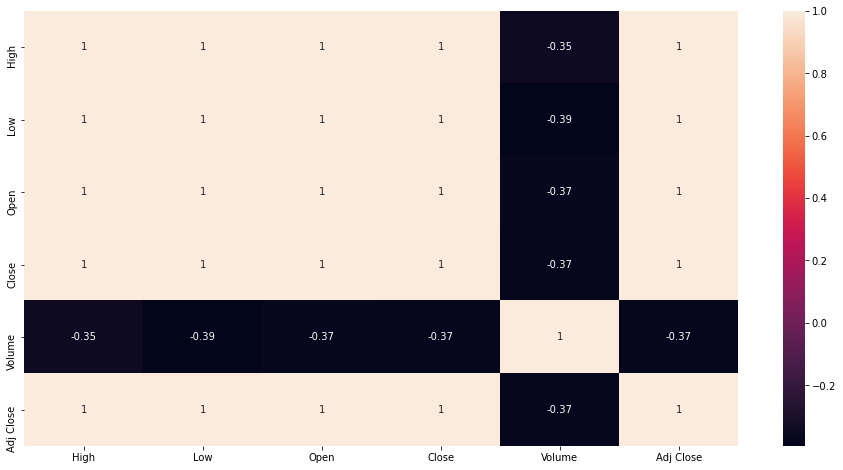

In [237]:
# Check correlation between variables

plt.figure(1 , figsize = (16 , 8))
correlation = sns.heatmap(apple_stock.corr(), annot = True)

In [238]:
# Create Index and data set for analysis 

apple_stock.reset_index(inplace=True)
apple_stock=apple_stock[['Date','High','Open','Low','Close','Volume','Adj Close']]


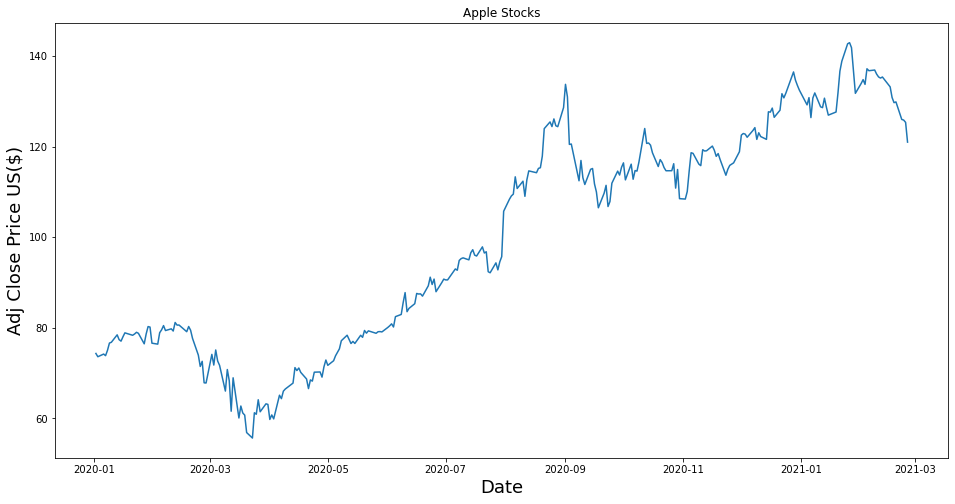

In [239]:
#Plot Apple Stock trends on Graph

plt.figure(figsize=(16,8))
plt.title('Apple Stocks')
plt.plot(apple_stock['Date'],apple_stock['Adj Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close Price US($)',fontsize=18)
plt.show()

In [240]:
# Prepate the dataset
apple_stock.reset_index(inplace=True)

# apple_stock=apple_stock[['Date','High','Open','Low','Close','Volume','Adj Close']]
# apple_stock['Date'] = pd.to_datetime(apple_stock.Date,format='%Y-%m-%d')
print(apple_stock)

     index       Date        High        Open         Low       Close  \
0        0 2020-01-02   75.150002   74.059998   73.797501   75.087502   
1        1 2020-01-03   75.144997   74.287498   74.125000   74.357498   
2        2 2020-01-06   74.989998   73.447502   73.187500   74.949997   
3        3 2020-01-07   75.224998   74.959999   74.370003   74.597504   
4        4 2020-01-08   76.110001   74.290001   74.290001   75.797501   
..     ...        ...         ...         ...         ...         ...   
285    285 2021-02-19  130.710007  130.240005  128.800003  129.869995   
286    286 2021-02-22  129.720001  128.009995  125.599998  126.000000   
287    287 2021-02-23  126.709999  123.760002  118.389999  125.860001   
288    288 2021-02-24  125.559998  124.940002  122.230003  125.349998   
289    289 2021-02-25  126.459999  124.680000  120.540001  120.989998   

          Volume   Adj Close  
0    135480400.0   74.333511  
1    146322800.0   73.610840  
2    118387200.0   74.197395  

In [241]:
#Set Date column as Index
# apple_stock['Date'] = pd.to_datetime(apple_stock.Date,format='%Y-%m-%d')

# apple_stock.index = apple_stock['Date']

# from datetime import datetime

# #timestamp = 1545730073
# # timestamp = datetime.fromtimestamp(apple_stock['Date']).timestamp()

# apple_stock['FormattedDate']= apple_stock['Date'].dt.year #+ apple_stock['Date'].dt.month + apple_stock['Date'].dt.day


# apple_stock = apple_stock[['FormattedDate','Adj Close']]
# apple_stock.head()

# apple_stock['Date'] = pd.to_datetime(apple_stock.Date,format='%Y-%m-%d')

date = pd.to_datetime(apple_stock.Date,format='%Y-%m-%d')
print(pd.to_datetime(date).astype(np.int64))
timestamp = pd.to_datetime(date).astype(np.int64)


# prices = df[df.columns[0:1]]
# prices.reset_index(level=0, inplace=True)
# prices["timestamp"] = pd.to_datetime(prices.date).astype(int) // (10**9)
# prices = prices.drop(['date'], axis=1)
# prices

0      1577923200000000000
1      1578009600000000000
2      1578268800000000000
3      1578355200000000000
4      1578441600000000000
              ...         
285    1613692800000000000
286    1613952000000000000
287    1614038400000000000
288    1614124800000000000
289    1614211200000000000
Name: Date, Length: 290, dtype: int64


In [248]:
# timestamp1 = timestamp / 10000000000
# print(timestamp1)
apple_stock['Timestamp']= apple_stock.index
apple_stock = apple_stock[['Timestamp','Adj Close']]
apple_stock.head()

,Timestamp,Adj Close
0,0,74.333511
1,1,73.610840
2,2,74.197395
3,3,73.848442
4,4,75.036385


In [249]:
#Split the data set into train and validation, 
training_data_len = math.ceil(len(apple_stock) * .9)

train = apple_stock[:training_data_len]
valid = apple_stock[training_data_len:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

In [250]:
# # scaler = MinMaxScaler(feature_range=(0, 1))

# #scaling data
# x_train_scaled = scaler.fit_transform(x_train)
# x_train = pd.DataFrame(x_train_scaled)
# x_valid_scaled = scaler.fit_transform(x_valid)
# x_valid = pd.DataFrame(x_valid_scaled)

In [251]:


# Implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_valid)

In [252]:
# Verify Quality Metrics
print('Coefficients: %.5f' % model.intercept_)
print('Root Mean Squared Error: %.5f' % math.sqrt(metrics.mean_squared_error(y_valid, predictions)))
print('Mean Squared Error: %.5f' % metrics.mean_squared_error(y_valid, predictions))
print('Mean Absolute Error: %.5f' % metrics.mean_absolute_error(y_valid, predictions))


Coefficients: 60.87727
Root Mean Squared Error: 6.86998
Mean Squared Error: 47.19660
Mean Absolute Error: 5.07425


In [253]:
#Plot Predictions on Graph
preds=model.predict(x_valid)

valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = apple_stock[training_data_len:].index
train.index = apple_stock[:training_data_len].index





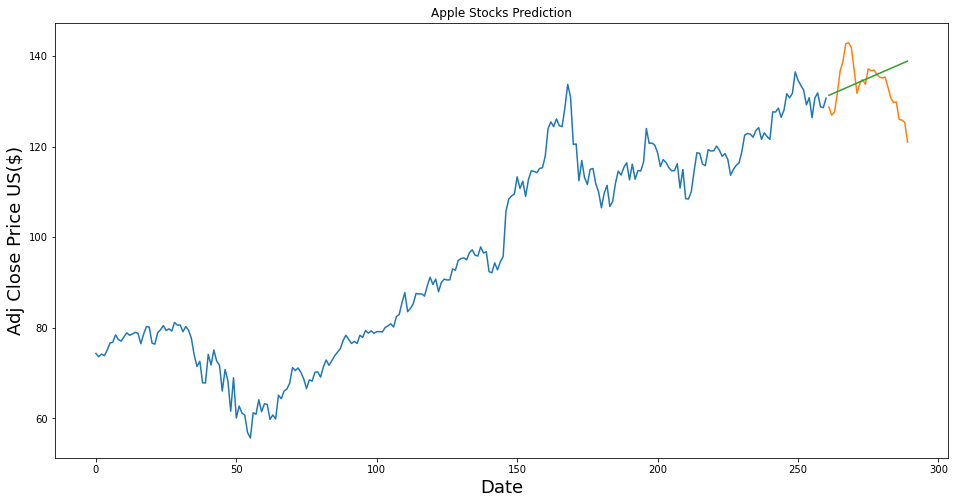

In [254]:
plt.figure(figsize=(16,8))
plt.title('Apple Stocks Prediction')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close Price US($)',fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])

plt.show()


In [255]:
model.score(x_valid,y_valid)

-0.661343660030008